In [1]:
import os
os.chdir("C:\\Users\\Venki\\Desktop\\data science\\All data")

In [32]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier 
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adadelta
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [3]:
g=pd.read_csv('gas_turbines.csv')

In [4]:
g

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [5]:
g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [6]:
g.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


# EDA and Visualisation

In [7]:
G=g[['TEY','AT','AP','AH','AFDP','GTEP','TIT','TAT','CDP','CO','NOX']]

In [8]:
G

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,114.70,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,114.72,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,114.71,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,114.72,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,114.72,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,111.61,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,111.78,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,110.19,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,110.74,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [9]:
G[G.duplicated()].shape

(0, 11)

In [10]:
G.corr()

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
TEY,1.000000,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,0.988473,-0.541751,-0.102631
AT,-0.207495,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.100705,-0.088588,-0.600006
AP,0.146939,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.131198,0.041614,0.256744
AH,-0.110272,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.182010,0.165505,0.143061
AFDP,0.717995,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.727152,-0.334207,-0.037299
GTEP,0.977042,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.993784,-0.508259,-0.208496
TIT,0.891587,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.887238,-0.688272,-0.231636
TAT,-0.720356,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.744740,0.063404,0.009888
CDP,0.988473,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,1.000000,-0.520783,-0.169103
CO,-0.541751,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.520783,1.000000,0.316743


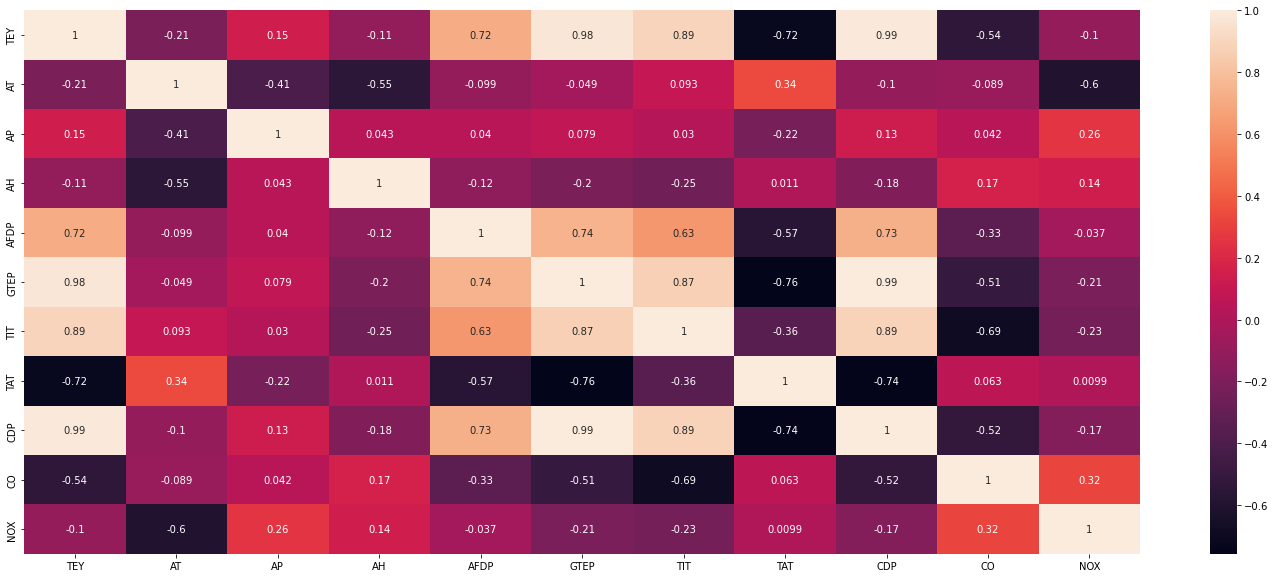

In [11]:
plt.figure(figsize = (25,10))
sns.heatmap(G.corr(),annot=True);

In [12]:
GT=G.drop(['GTEP'],axis=1)
GT

,TEY,AT,AP,AH,AFDP,TIT,TAT,CDP,CO,NOX
0,114.70,6.8594,1007.9,96.799,3.5000,1059.2,550.00,10.605,3.1547,82.722
1,114.72,6.7850,1008.4,97.118,3.4998,1059.3,550.00,10.598,3.2363,82.776
2,114.71,6.8977,1008.8,95.939,3.4824,1059.4,549.87,10.601,3.2012,82.468
3,114.72,7.0569,1009.2,95.249,3.4805,1059.6,549.99,10.606,3.1923,82.670
4,114.72,7.3978,1009.7,95.150,3.4976,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,111.61,9.0301,1005.6,98.460,3.5421,1049.7,546.21,10.400,4.5186,79.559
15035,111.78,7.8879,1005.9,99.093,3.5059,1046.3,543.22,10.433,4.8470,79.917
15036,110.19,7.2647,1006.3,99.496,3.4770,1037.7,537.32,10.483,7.9632,90.912
15037,110.74,7.0060,1006.8,99.008,3.4486,1043.2,541.24,10.533,6.2494,93.227


In [13]:
scaler=StandardScaler()

In [14]:
gtscaled=scaler.fit_transform(GT)
gtscaled

array([[-1.23117246, -1.4397781 , -0.82664395, ..., -1.35733078,
         0.53201195,  1.3878449 ],
       [-1.22990897, -1.44960109, -0.74864748, ..., -1.36367619,
         0.56873344,  1.39300237],
       [-1.23054071, -1.43472138, -0.68625031, ..., -1.36095673,
         0.5529378 ,  1.36358566],
       ...,
       [-1.5160891 , -1.38626659, -1.07623263, ..., -1.46792219,
         2.69592467,  2.17006209],
       [-1.48134317, -1.42042259, -0.99823616, ..., -1.42259784,
         1.9246834 ,  2.391165  ],
       [-1.42827666, -1.43073409, -0.93583899, ..., -1.37727349,
         1.35415028,  2.32153907]])

In [15]:
stdGT=pd.DataFrame(gtscaled,columns=GT.columns[0:])
stdGT

,TEY,AT,AP,AH,AFDP,TIT,TAT,CDP,CO,NOX
0,-1.231172,-1.439778,-0.826644,1.281436,-0.921232,-1.488376,0.585240,-1.357331,0.532012,1.387845
1,-1.229909,-1.449601,-0.748647,1.304564,-0.921495,-1.482325,0.585240,-1.363676,0.568733,1.393002
2,-1.230541,-1.434721,-0.686250,1.219086,-0.944385,-1.476275,0.568715,-1.360957,0.552938,1.363586
3,-1.229909,-1.413702,-0.623853,1.169060,-0.946884,-1.464173,0.583969,-1.356424,0.548933,1.382878
4,-1.229909,-1.368693,-0.545857,1.161883,-0.924389,-1.458123,0.582698,-1.350985,0.574179,1.348591
...,...,...,...,...,...,...,...,...,...,...
15034,-1.426381,-1.153182,-1.185428,1.401860,-0.865850,-2.063184,0.103453,-1.543161,1.145792,1.085751
15035,-1.415642,-1.303986,-1.138630,1.447753,-0.913470,-2.268905,-0.276638,-1.513247,1.293578,1.119943
15036,-1.516089,-1.386267,-1.076233,1.476971,-0.951488,-2.789257,-1.026650,-1.467922,2.695925,2.170062
15037,-1.481343,-1.420423,-0.998236,1.441590,-0.988848,-2.456474,-0.528337,-1.422598,1.924683,2.391165


<AxesSubplot:xlabel='TAT', ylabel='Density'>

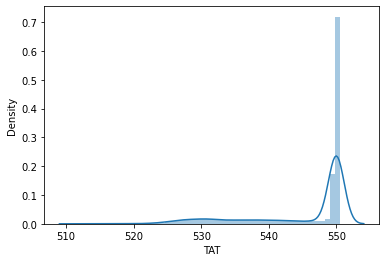

In [16]:
sns.distplot(GT.TAT)

<AxesSubplot:xlabel='AT', ylabel='Density'>

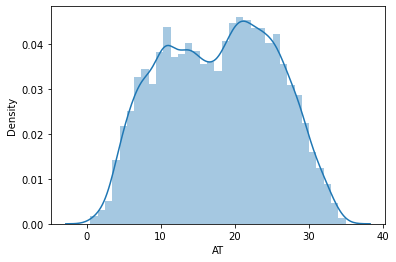

In [17]:
sns.distplot(GT.AT)

<AxesSubplot:xlabel='AP', ylabel='Density'>

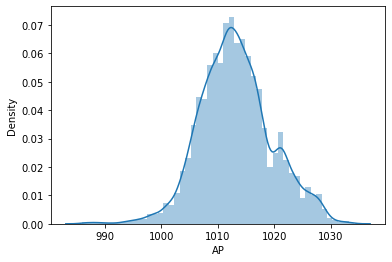

In [18]:
sns.distplot(GT.AP)

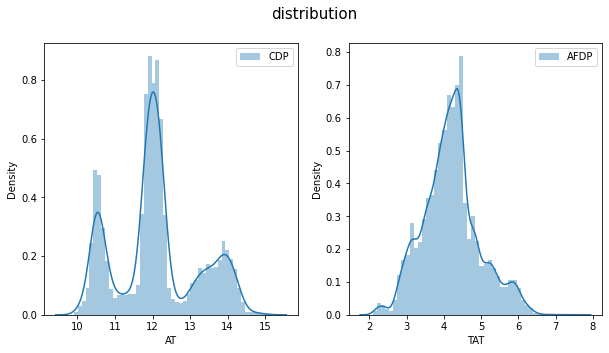

In [19]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.suptitle('distribution',fontsize=15)

sns.distplot(GT.CDP,label='CDP')
plt.xlabel('AT')
plt.ylabel('Density')
plt.legend()

plt.subplot(1,2,2)
sns.distplot(GT.AFDP,label='AFDP')
plt.xlabel('TAT')
plt.ylabel('Density')
plt.legend();

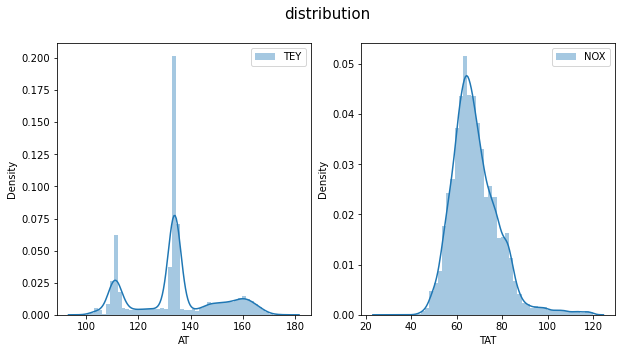

In [20]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.suptitle('distribution',fontsize=15)

sns.distplot(GT.TEY,label='TEY')
plt.xlabel('AT')
plt.ylabel('Density')
plt.legend()

plt.subplot(1,2,2)
sns.distplot(GT.NOX,label='NOX')
plt.xlabel('TAT')
plt.ylabel('Density')
plt.legend();

# Model

In [24]:
x=stdGT.iloc[:,1:]
y=stdGT.iloc[:,0]

In [25]:
x

,AT,AP,AH,AFDP,TIT,TAT,CDP,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.488376,0.585240,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.482325,0.585240,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.476275,0.568715,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.464173,0.583969,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.458123,0.582698,-1.350985,0.574179,1.348591
...,...,...,...,...,...,...,...,...,...
15034,-1.153182,-1.185428,1.401860,-0.865850,-2.063184,0.103453,-1.543161,1.145792,1.085751
15035,-1.303986,-1.138630,1.447753,-0.913470,-2.268905,-0.276638,-1.513247,1.293578,1.119943
15036,-1.386267,-1.076233,1.476971,-0.951488,-2.789257,-1.026650,-1.467922,2.695925,2.170062
15037,-1.420423,-0.998236,1.441590,-0.988848,-2.456474,-0.528337,-1.422598,1.924683,2.391165


In [26]:
y

0       -1.231172
1       -1.229909
2       -1.230541
3       -1.229909
4       -1.229909
           ...   
15034   -1.426381
15035   -1.415642
15036   -1.516089
15037   -1.481343
15038   -1.428277
Name: TEY, Length: 15039, dtype: float64

In [27]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=9, activation='tanh'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [28]:
estimator = KerasRegressor(build_fn=create_model, nb_epoch=50, batch_size=100, verbose=False)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, x, y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -0.26 (0.24) MSE


In [29]:
estimator.fit(x, y)

In [31]:
pred= estimator.predict(x)
pred

array([-1.0332958 , -1.0250494 , -1.0216595 , ...,  0.18445876,
       -0.19349162, -0.6674477 ], dtype=float32)

In [36]:
input_size = 9
output_size = 1
hidden_layer_size = 60

model = tf.keras.Sequential([
                                
                               tf.keras.layers.Dense(hidden_layer_size, input_dim = input_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(output_size)
                             ])

In [37]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.03)
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MeanSquaredError'])

In [38]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 60)                600       
                                                                 
 dense_27 (Dense)            (None, 60)                3660      
                                                                 
 dense_28 (Dense)            (None, 60)                3660      
                                                                 
 dense_29 (Dense)            (None, 1)                 61        
                                                                 
Total params: 7,981
Trainable params: 7,981
Non-trainable params: 0
_________________________________________________________________


In [40]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=30)

# Final Model

In [41]:
Final=model.fit(X_train,Y_train,validation_split=0.3,epochs=70,batch_size=200)

Epoch 1/70
37/37 [==============================] - 2s 11ms/step - loss: 0.2852 - mean_squared_error: 0.2852 - val_loss: 0.0356 - val_mean_squared_error: 0.0356
Epoch 2/70
37/37 [==============================] - 0s 5ms/step - loss: 0.0192 - mean_squared_error: 0.0192 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 3/70
37/37 [==============================] - 0s 5ms/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 4/70
37/37 [==============================] - 0s 5ms/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 5/70
37/37 [==============================] - 0s 5ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 6/70
37/37 [==============================] - 0s 5ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 7/70
37/37 [=====================

Epoch 52/70
37/37 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 53/70
37/37 [==============================] - 0s 3ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 54/70
37/37 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 55/70
37/37 [==============================] - 0s 4ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 56/70
37/37 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 57/70
37/37 [==============================] - 0s 4ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 58/70
37/37 [===============

In [42]:
scores = model.evaluate(x, y)
print("%s: %.2f%%"  %(model.metrics_names[1], scores[1]))

470/470 [==============================] - 1s 2ms/step - loss: 0.0011 - mean_squared_error: 0.0011
mean_squared_error: 0.00%


In [43]:
model.history.history.keys()

dict_keys([])

In [44]:
Final.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

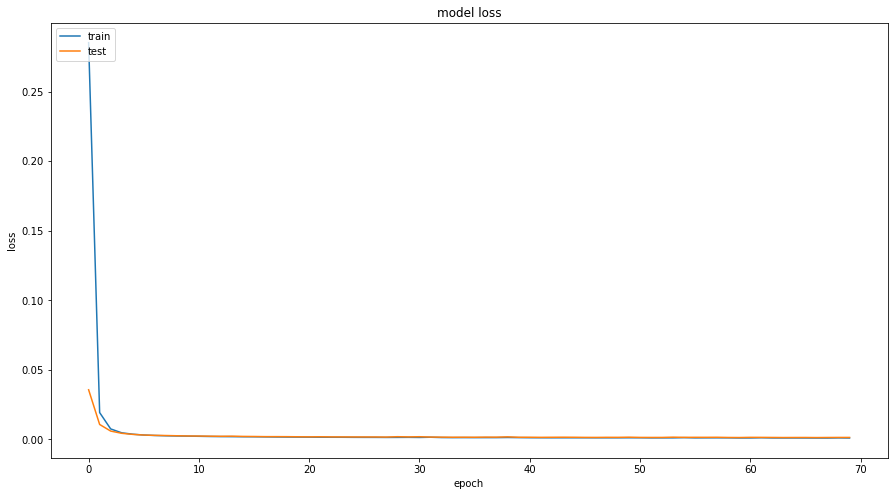

In [45]:
plt.figure(figsize=(15,8))
plt.plot(Final.history['loss'])
plt.plot(Final.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
prediction = model.predict(X_test)
print(prediction)

141/141 [==============================] - 0s 2ms/step
[[-0.05881322]
 [-0.71022123]
 [-0.01979142]
 ...
 [-0.0483963 ]
 [-0.280752  ]
 [ 1.694528  ]]


In [47]:
df = pd.DataFrame(prediction,columns=['TEY'])
df

,TEY
0,-0.058813
1,-0.710221
2,-0.019791
3,-0.015767
4,0.023535
...,...
4507,-0.161940
4508,0.455110
4509,-0.048396
4510,-0.280752


In [48]:
predictions_df = pd.DataFrame()
predictions_df['Actual'] = Y_test
predictions_df['Predicted'] = prediction
predictions_df['% Error'] = abs(predictions_df['Actual'] - predictions_df['Predicted'])/predictions_df['Actual']*100
predictions_df.reset_index(drop = True)

,Actual,Predicted,% Error
0,-0.088979,-0.058813,-33.902057
1,-0.720723,-0.710221,-1.457133
2,-0.025804,-0.019791,-23.302391
3,-0.027068,-0.015767,-41.749146
4,0.004519,0.023535,420.763291
...,...,...,...
4507,-0.191321,-0.161940,-15.357067
4508,0.464429,0.455110,2.006504
4509,-0.023277,-0.048396,-107.910200
4510,-0.248810,-0.280752,-12.837824


# Model on Actual Data

In [49]:
GT

,TEY,AT,AP,AH,AFDP,TIT,TAT,CDP,CO,NOX
0,114.70,6.8594,1007.9,96.799,3.5000,1059.2,550.00,10.605,3.1547,82.722
1,114.72,6.7850,1008.4,97.118,3.4998,1059.3,550.00,10.598,3.2363,82.776
2,114.71,6.8977,1008.8,95.939,3.4824,1059.4,549.87,10.601,3.2012,82.468
3,114.72,7.0569,1009.2,95.249,3.4805,1059.6,549.99,10.606,3.1923,82.670
4,114.72,7.3978,1009.7,95.150,3.4976,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,111.61,9.0301,1005.6,98.460,3.5421,1049.7,546.21,10.400,4.5186,79.559
15035,111.78,7.8879,1005.9,99.093,3.5059,1046.3,543.22,10.433,4.8470,79.917
15036,110.19,7.2647,1006.3,99.496,3.4770,1037.7,537.32,10.483,7.9632,90.912
15037,110.74,7.0060,1006.8,99.008,3.4486,1043.2,541.24,10.533,6.2494,93.227


In [50]:
X=GT.iloc[:,1:]
Y=GT.iloc[:,0]

In [51]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=40)

In [52]:
FinalModel=model.fit(x_train,y_train,validation_split=0.3,epochs=70,batch_size=200)

Epoch 1/70
37/37 [==============================] - 0s 7ms/step - loss: 5818.1699 - mean_squared_error: 5818.1699 - val_loss: 235.4611 - val_mean_squared_error: 235.4611
Epoch 2/70
37/37 [==============================] - 0s 5ms/step - loss: 169.6678 - mean_squared_error: 169.6678 - val_loss: 158.0036 - val_mean_squared_error: 158.0036
Epoch 3/70
37/37 [==============================] - 0s 5ms/step - loss: 147.6351 - mean_squared_error: 147.6351 - val_loss: 146.5315 - val_mean_squared_error: 146.5315
Epoch 4/70
37/37 [==============================] - 0s 5ms/step - loss: 141.0339 - mean_squared_error: 141.0339 - val_loss: 141.2921 - val_mean_squared_error: 141.2921
Epoch 5/70
37/37 [==============================] - 0s 5ms/step - loss: 135.9249 - mean_squared_error: 135.9249 - val_loss: 135.9379 - val_mean_squared_error: 135.9379
Epoch 6/70
37/37 [==============================] - 0s 5ms/step - loss: 130.5730 - mean_squared_error: 130.5730 - val_loss: 130.7222 - val_mean_squared_error:

Epoch 51/70
37/37 [==============================] - 0s 4ms/step - loss: 3.1106 - mean_squared_error: 3.1106 - val_loss: 3.1110 - val_mean_squared_error: 3.1110
Epoch 52/70
37/37 [==============================] - 0s 4ms/step - loss: 3.0699 - mean_squared_error: 3.0699 - val_loss: 3.0607 - val_mean_squared_error: 3.0607
Epoch 53/70
37/37 [==============================] - 0s 4ms/step - loss: 2.8657 - mean_squared_error: 2.8657 - val_loss: 2.8909 - val_mean_squared_error: 2.8909
Epoch 54/70
37/37 [==============================] - 0s 4ms/step - loss: 2.7391 - mean_squared_error: 2.7391 - val_loss: 2.7796 - val_mean_squared_error: 2.7796
Epoch 55/70
37/37 [==============================] - 0s 5ms/step - loss: 2.6593 - mean_squared_error: 2.6593 - val_loss: 2.6117 - val_mean_squared_error: 2.6117
Epoch 56/70
37/37 [==============================] - 0s 4ms/step - loss: 2.5874 - mean_squared_error: 2.5874 - val_loss: 2.6775 - val_mean_squared_error: 2.6775
Epoch 57/70
37/37 [===============

In [53]:
Scores = model.evaluate(X, Y)
print("%s: %.2f%%"  %(model.metrics_names[1], scores[1]))

470/470 [==============================] - 1s 2ms/step - loss: 1.8436 - mean_squared_error: 1.8436
mean_squared_error: 0.00%


In [54]:
FinalModel.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

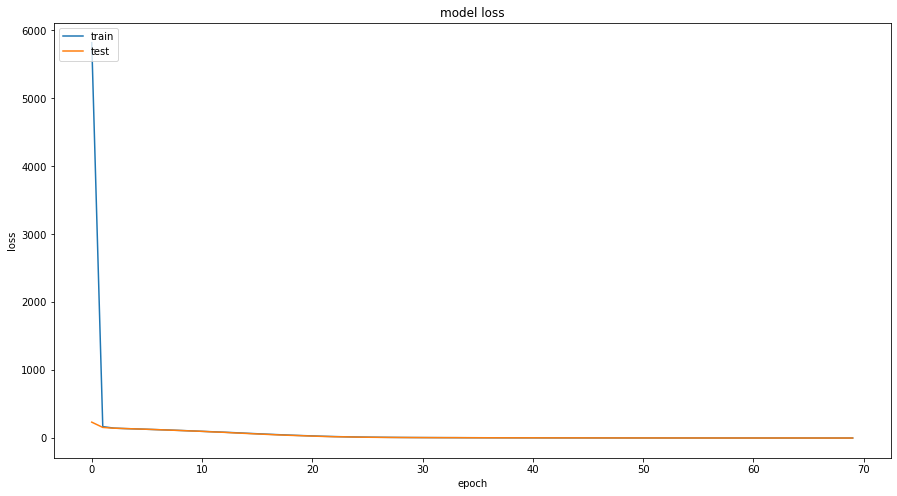

In [55]:
plt.figure(figsize=(15,8))
plt.plot(FinalModel.history['loss'])
plt.plot(FinalModel.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [56]:
predictions = model.predict(x_test)
print(predictions)

141/141 [==============================] - 0s 1ms/step
[[133.4398 ]
 [167.84663]
 [133.26474]
 ...
 [130.20683]
 [136.36444]
 [135.96501]]


In [57]:
DF = pd.DataFrame(predictions,columns=['TEY'])
DF

,TEY
0,133.439804
1,167.846634
2,133.264740
3,145.558441
4,134.407791
...,...
4507,134.504669
4508,152.999359
4509,130.206833
4510,136.364441


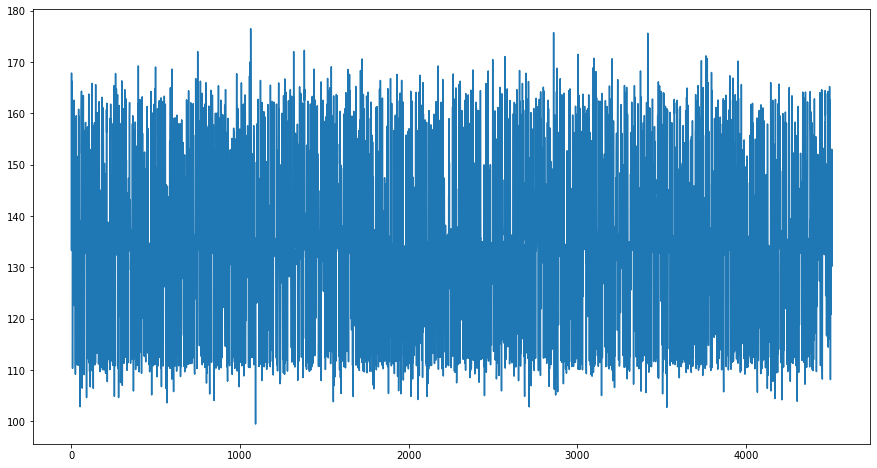

In [58]:
plt.figure(figsize=(15,8))
plt.plot(predictions)

In [59]:
Predictions_df = pd.DataFrame()
Predictions_df['Actual'] = y_test
Predictions_df['Predicted'] = predictions
Predictions_df['% Error'] = abs(Predictions_df['Actual'] - Predictions_df['Predicted'])/Predictions_df['Actual']*100
Predictions_df.reset_index(drop = True)

,Actual,Predicted,% Error
0,133.78,133.439804,0.254295
1,167.61,167.846634,0.141181
2,133.84,133.264740,0.429812
3,147.05,145.558441,1.014321
4,134.01,134.407791,0.296837
...,...,...,...
4507,134.16,134.504669,0.256909
4508,153.28,152.999359,0.183090
4509,132.30,130.206833,1.582137
4510,134.86,136.364441,1.115558
